In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import numpy as np

In [50]:
# Load data from files
with open('Time.txt', 'r') as f:
    time_data = f.readlines()

with open('CF_Denmark.txt', 'r') as f:
    cf_data = f.readlines()

# Convert time data to datetime objects
time_data = [datetime.datetime.strptime(x.strip(), '%Y-%m-%dT%H:%M:%SZ') for x in time_data]

# Convert cf data to float values
cf_data = [float(x.strip()) for x in cf_data]

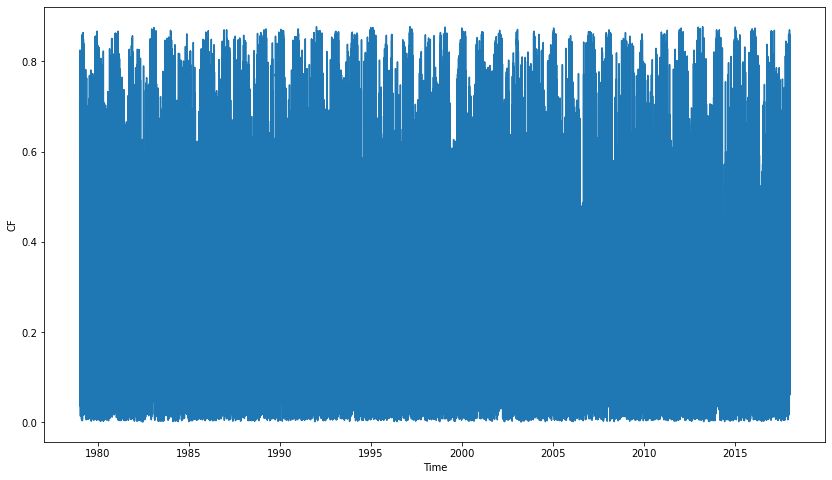

In [51]:
# Create plot
fig1, ax = plt.subplots(figsize=(14, 8))
ax.plot(time_data, cf_data)
ax.set_xlabel('Time')
ax.set_ylabel('CF')
plt.show()

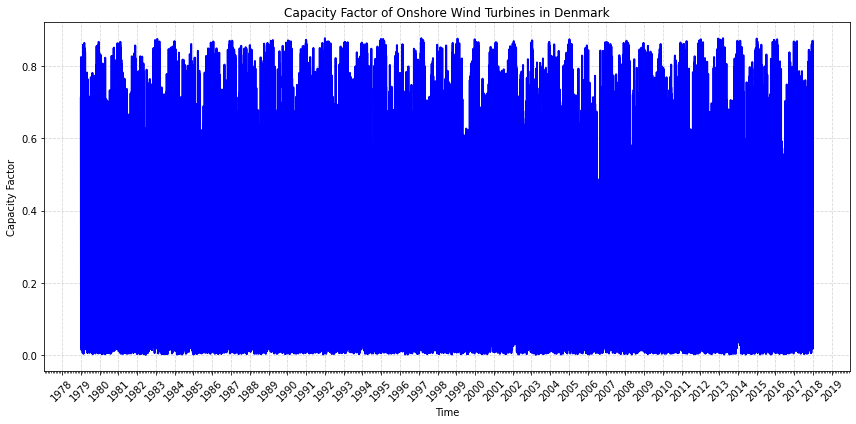

In [52]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(time_data, cf_data, color='blue', linewidth=2)

# Set title and labels
ax.set_title('Capacity Factor of Onshore Wind Turbines in Denmark')
ax.set_xlabel('Time')
ax.set_ylabel('Capacity Factor')

# Customize tick labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a legend if necessary
# ax.legend(['Capacity Factor'])

# Add a tight layout
plt.tight_layout()

# Save the figure if needed
# plt.savefig('capacity_factor_plot.png', dpi=300)

# Display the plot
plt.show()

In [53]:
maximum_cf = np.max(cf_data)
print("Maximum Capacity Factor:", maximum_cf)

Maximum Capacity Factor: 0.877


In [54]:
# Create a DataFrame with the time and cf data
df = pd.DataFrame({'time': time_data, 'cf': cf_data})

# Group the data by year and calculate the mean CF for each year
yearly_data = df.groupby(df.time.dt.year)['cf'].mean()

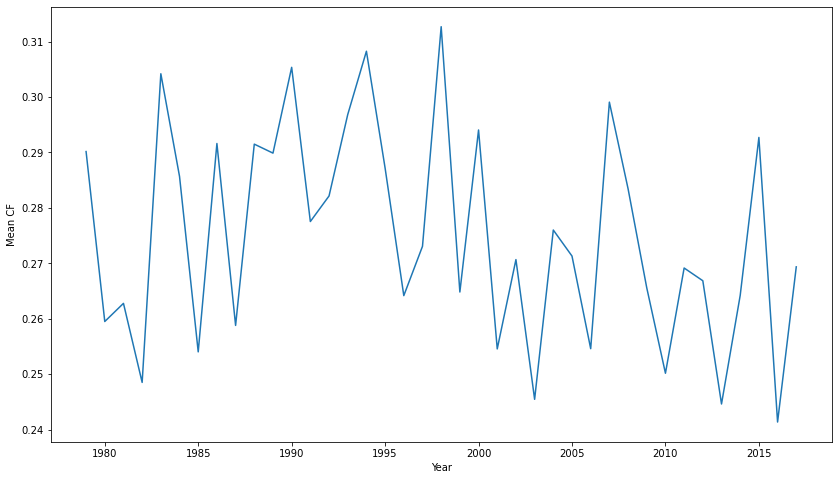

In [55]:
# Create plot
fig1, ax1 = plt.subplots(figsize=(14, 8))
ax1.plot(yearly_data.index, yearly_data.values)
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean CF')
plt.show()

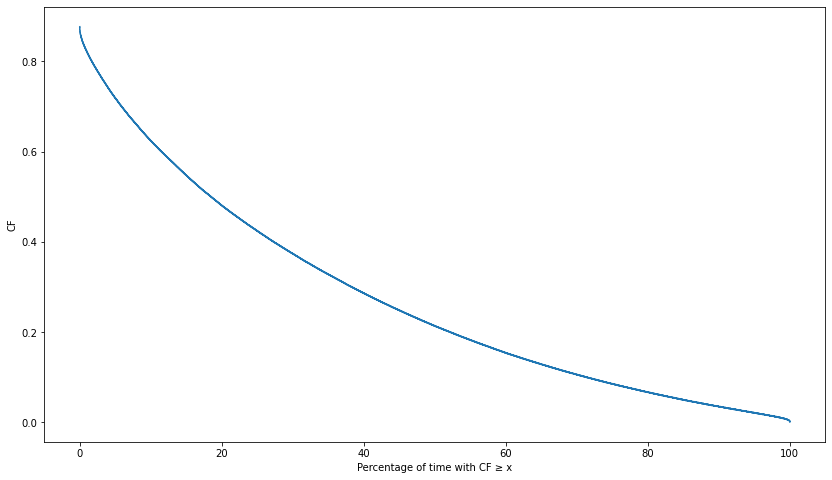

In [56]:
# Sort the CF data in descending order
sorted_cf = df['cf'].sort_values(ascending=False)

# Calculate the percentage of time that the CF was greater than or equal to each value
percentage = 100 * (1 - sorted_cf.rank(method='first') / len(sorted_cf))

# Create plot
fig2, ax2 = plt.subplots(figsize=(14, 8))
ax2.plot(percentage,sorted_cf)
ax2.set_ylabel('CF')
ax2.set_xlabel('Percentage of time with CF ≥ x')
plt.show()

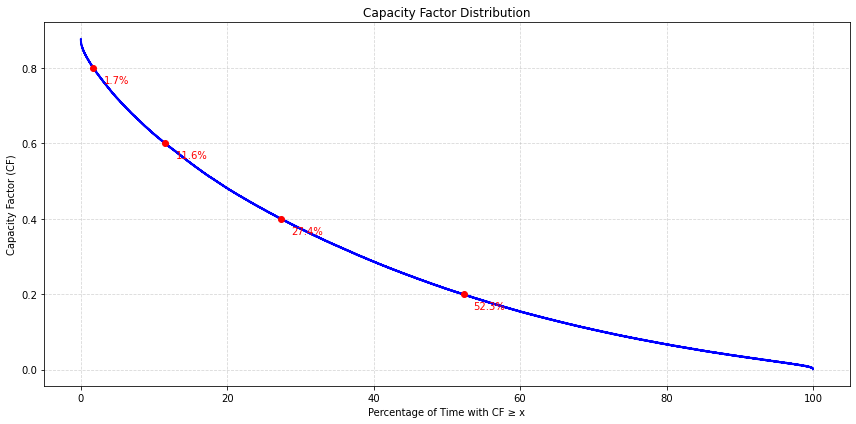

In [57]:
# Sort the CF data in descending order
sorted_cf = df['cf'].sort_values(ascending=False)

# Calculate the percentage of time that the CF was greater than or equal to each value
percentage = 100 * (1 - sorted_cf.rank(method='first') / len(sorted_cf))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(percentage, sorted_cf, color='blue', linewidth=2)

# Add dots and annotations for specific CF values
cf_values = [0.2, 0.4, 0.6, 0.8]
for cf_value in cf_values:
    index = np.abs(sorted_cf - cf_value).idxmin()
    ax.plot(percentage.loc[index], cf_value, 'ro')
    ax.annotate(f'{percentage.loc[index]:.1f}%', xy=(percentage.loc[index], cf_value),
                xytext=(10, -15), textcoords='offset points', color='red')

# Set title and labels
ax.set_title('Capacity Factor Distribution')
ax.set_ylabel('Capacity Factor (CF)')
ax.set_xlabel('Percentage of Time with CF ≥ x')

# Customize tick labels
ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Add a tight layout
plt.tight_layout()

# Save the figure if needed
# plt.savefig('capacity_factor_distribution.png', dpi=300)

# Display the plot
plt.show()

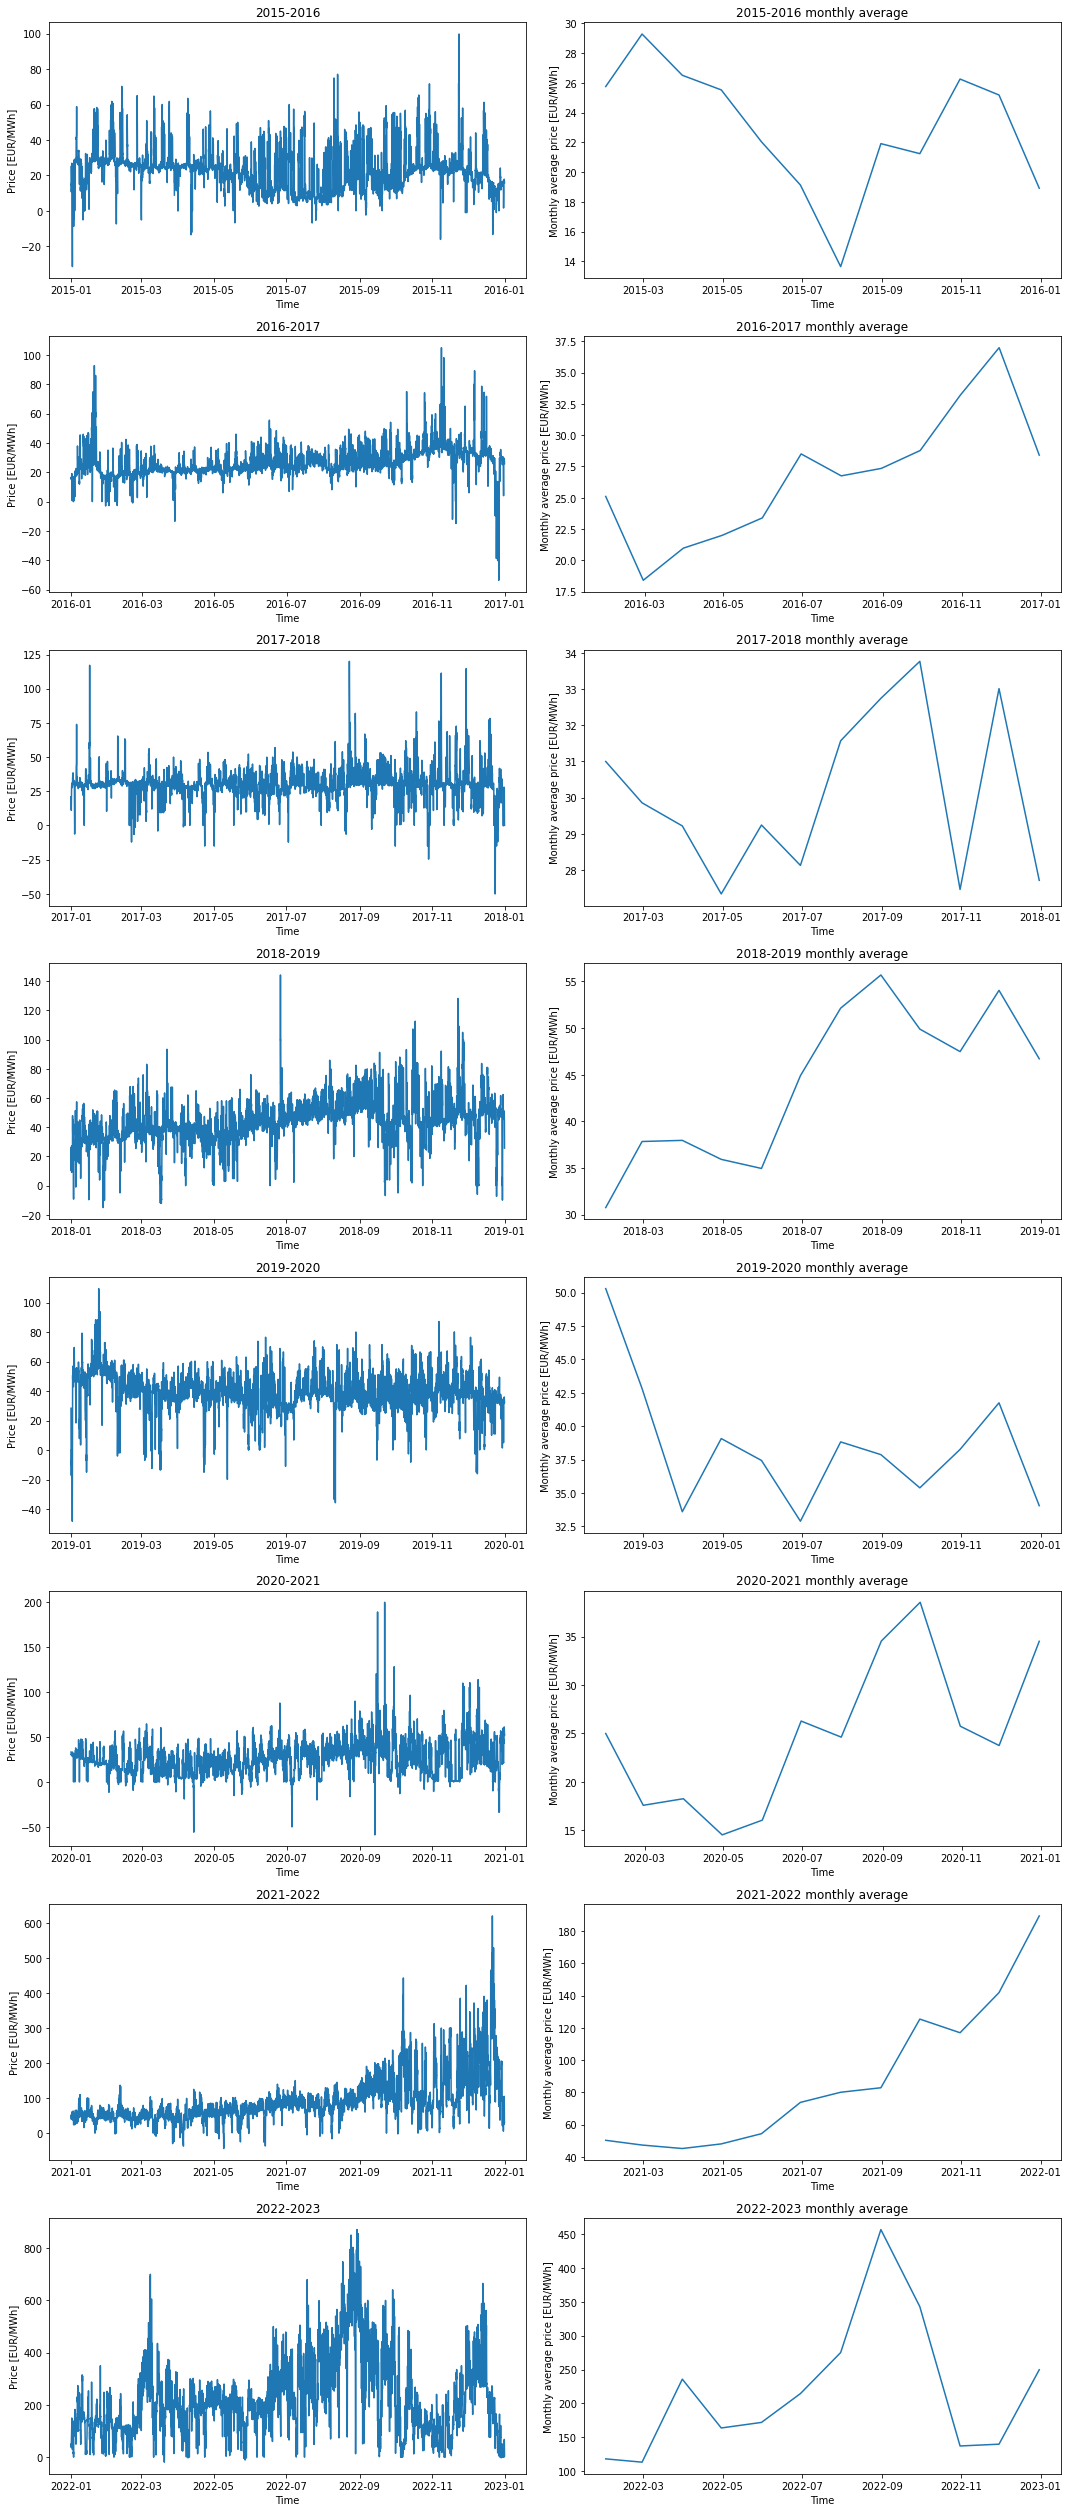

In [58]:
# Electicity Prices for DK1
# Define filenames and titles
filenames = ['Day-ahead Prices_201501010000-201601010000.csv', 'Day-ahead Prices_201601010000-201701010000.csv', 'Day-ahead Prices_201701010000-201801010000.csv', 'Day-ahead Prices_201801010000-201901010000.csv', 'Day-ahead Prices_201901010000-202001010000.csv', 'Day-ahead Prices_202001010000-202101010000.csv', 'Day-ahead Prices_202101010000-202201010000.csv', 'Day-ahead Prices_202201010000-202301010000.csv']
titles = ['2015-2016', '2016-2017', '2017-2018','2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

# Create a figure with subplots
fig, axs = plt.subplots(8, 2, figsize=(15,35))

# Loop through the filenames and subplot titles
for i, (filename, title) in enumerate(zip(filenames, titles)):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filename, delimiter=',')

    
    # Modify the 'MTU (CET/CEST)' column to remove the time interval
    df['MTU (CET/CEST)'] = df['MTU (CET/CEST)'].apply(lambda x: x.split(' - ')[0])

    # Convert the 'Day-ahead Price [EUR/MWh]' column to a float type
    df['Day-ahead Price [EUR/MWh]'] = df['Day-ahead Price [EUR/MWh]'].astype(float)

    # Convert the 'MTU (CET/CEST)' column to a datetime type
    df['MTU (CET/CEST)'] = pd.to_datetime(df['MTU (CET/CEST)'], format='%d.%m.%Y %H:%M')

    # Plot original data
    axs[i, 0].plot(df['MTU (CET/CEST)'], df['Day-ahead Price [EUR/MWh]'])
    axs[i, 0].set_xlabel('Time')
    axs[i, 0].set_ylabel('Price [EUR/MWh]')
    axs[i, 0].set_title(title)

    # Plot monthly data
    df_monthly = df.groupby(pd.Grouper(key='MTU (CET/CEST)', freq='M'))['Day-ahead Price [EUR/MWh]'].mean()
    axs[i, 1].plot(df_monthly.index, df_monthly.values)
    axs[i, 1].set_xlabel('Time')
    axs[i, 1].set_ylabel('Monthly average price [EUR/MWh]')
    axs[i, 1].set_title(title + ' monthly average')

plt.tight_layout()
plt.show()

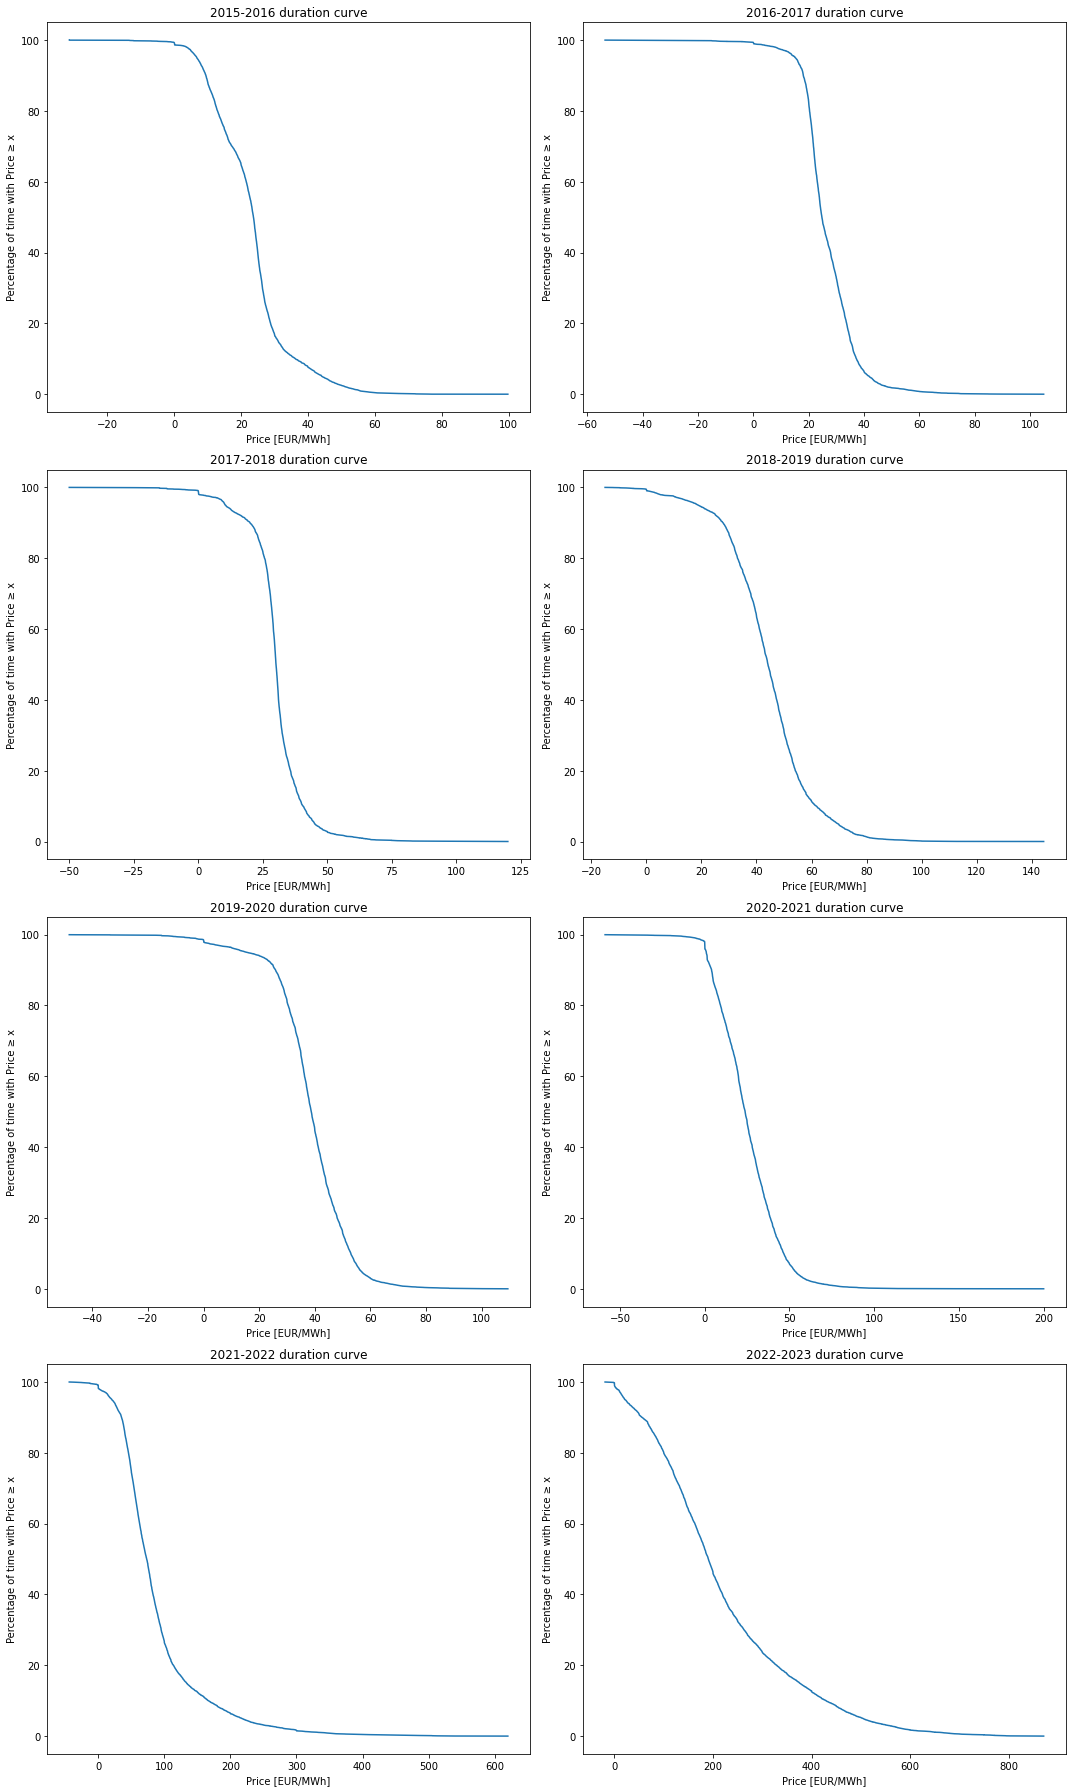

In [59]:
# Plot duration curves
# Define filenames and titles
filenames = ['Day-ahead Prices_201501010000-201601010000.csv', 'Day-ahead Prices_201601010000-201701010000.csv', 'Day-ahead Prices_201701010000-201801010000.csv', 'Day-ahead Prices_201801010000-201901010000.csv', 'Day-ahead Prices_201901010000-202001010000.csv', 'Day-ahead Prices_202001010000-202101010000.csv', 'Day-ahead Prices_202101010000-202201010000.csv', 'Day-ahead Prices_202201010000-202301010000.csv']
titles = ['2015-2016', '2016-2017', '2017-2018','2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

# Create a figure with subplots
fig, axs = plt.subplots(4, 2, figsize=(15,25))

# Loop through the filenames and subplot titles
for i, (filename, title) in enumerate(zip(filenames, titles)):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(filename, delimiter=',')

    # Modify the 'MTU (CET/CEST)' column to remove the time interval
    df['MTU (CET/CEST)'] = df['MTU (CET/CEST)'].apply(lambda x: x.split(' - ')[0])

    # Convert the 'Day-ahead Price [EUR/MWh]' column to a float type
    df['Day-ahead Price [EUR/MWh]'] = df['Day-ahead Price [EUR/MWh]'].astype(float)

    # Convert the 'MTU (CET/CEST)' column to a datetime type
    df['MTU (CET/CEST)'] = pd.to_datetime(df['MTU (CET/CEST)'], format='%d.%m.%Y %H:%M')

    # Compute duration curve
    sorted_prices = df['Day-ahead Price [EUR/MWh]'].sort_values()
    # Calculate the percentage of time that the CF was greater than or equal to each value
    cumulative_percentages = 100 * (1 - sorted_prices.rank(method='first') / len(sorted_prices))

    # Plot duration curve
    axs.flat[i].plot(sorted_prices, cumulative_percentages)
    axs.flat[i].set_xlabel('Price [EUR/MWh]')
    axs.flat[i].set_ylabel('Percentage of time with Price ≥ x')
    axs.flat[i].set_title(title + ' duration curve')

plt.tight_layout()
plt.show()